In [3]:
import pandas as pd

In [4]:
import quandl

In [5]:
import pickle

In [6]:
import matplotlib.pyplot as plt

In [7]:
from matplotlib import style

In [8]:
style.use('fivethirtyeight')

In [9]:
api_key = open('quandlapikey.txt','r').read()

In [10]:
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')#read data from html page
    return fiddy_states[0][0][1:]# selecting first table of html page
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns={'Value':str(abbv)}, inplace=True)#its done because of value error
        print(query)
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
    pickle_out = open('fiddy_states.pickle','wb')#wb stands for write bytes
    pickle.dump(main_df, pickle_out)
    pickle_out.close()        

    
grab_initial_state_data()

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


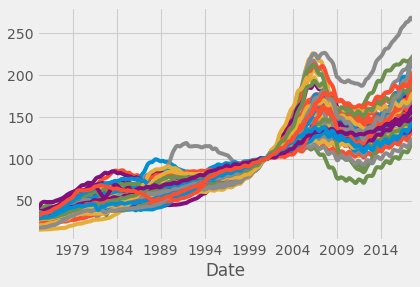

In [39]:


HPI_data = pd.read_pickle('fiddy_states.pickle')
HPI_data.plot()
plt.legend().remove()
plt.show()

In [33]:
HPI_data

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.303417,34.527918,28.940032,36.838815,15.644547,19.630026,24.448197,27.122817,31.178268,30.721998,...,37.928775,32.256816,32.582514,24.537282,26.562005,27.945021,17.331629,40.881718,28.364836,31.425109
1975-02-28,35.502507,35.026256,29.409528,37.223497,15.693093,19.821180,24.978337,27.108578,32.306122,30.475086,...,37.463460,32.272559,32.956762,24.915536,26.880710,28.213562,17.437792,41.956890,28.719369,31.929642
1975-03-31,35.734654,35.536666,29.861852,37.561809,15.887119,20.013280,25.376128,27.132215,34.048244,30.372700,...,36.994328,32.335014,33.592795,25.252674,27.189255,28.419414,17.570050,43.075651,29.044479,32.459696
1975-04-30,36.015829,36.074757,30.227061,37.836285,16.203236,20.207580,25.589234,27.243265,36.262987,30.430184,...,36.533508,32.448240,34.460884,25.517926,27.471153,28.586343,17.712653,44.224846,29.310520,32.998744
1975-05-31,36.267298,36.676178,30.433976,38.086996,16.459320,20.382426,25.635869,27.469625,36.488976,30.522158,...,36.119922,32.589892,34.658289,25.694623,27.719357,28.743314,17.836880,45.371374,29.518618,33.505875
1975-06-30,36.372099,37.331373,30.409924,38.331987,16.564613,20.538040,25.579953,27.759155,34.783929,30.525906,...,35.806973,32.754949,34.159936,25.754537,27.939799,28.900575,17.966896,46.452108,29.682514,33.967067
1975-07-31,36.278301,37.987138,30.120594,38.531877,16.678888,20.647111,25.515338,28.035697,33.555738,30.403018,...,35.600066,32.936685,33.855268,25.702848,28.121733,29.100977,18.112345,47.389039,29.820097,34.389217
1975-08-31,36.043457,38.583533,29.648589,38.644881,16.910627,20.648437,25.504637,28.287205,33.005281,30.157197,...,35.449079,33.132335,33.842428,25.619391,28.242816,29.296691,18.196687,48.126994,29.953518,34.762502
1975-09-30,35.805515,39.097704,29.159975,38.643773,17.167550,20.582772,25.562230,28.512340,32.857250,29.816094,...,35.326186,33.375027,33.938596,25.602259,28.305838,29.360325,18.188687,48.611865,30.147417,35.070594


# writing percent changes into fiddy_states2.pickle

In [36]:
def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns={'Value':str(abbv)}, inplace=True)#its done because of value error
        print(query)
        df = df.pct_change()#percent change 
        print(df.head())
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states2.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

grab_initial_state_data() 

FMAC/HPI_AL
                  AL
Date                
1975-01-31       NaN
1975-02-28  0.005639
1975-03-31  0.006539
1975-04-30  0.007868
1975-05-31  0.006982
FMAC/HPI_AK
                  AK
Date                
1975-01-31       NaN
1975-02-28  0.014433
1975-03-31  0.014572
1975-04-30  0.015142
1975-05-31  0.016672
FMAC/HPI_AZ
                  AZ
Date                
1975-01-31       NaN
1975-02-28  0.016223
1975-03-31  0.015380
1975-04-30  0.012230
1975-05-31  0.006845
FMAC/HPI_AR
                  AR
Date                
1975-01-31       NaN
1975-02-28  0.010442
1975-03-31  0.009089
1975-04-30  0.007307
1975-05-31  0.006626
FMAC/HPI_CA
                  CA
Date                
1975-01-31       NaN
1975-02-28  0.003103
1975-03-31  0.012364
1975-04-30  0.019898
1975-05-31  0.015804
FMAC/HPI_CO
                  CO
Date                
1975-01-31       NaN
1975-02-28  0.009738
1975-03-31  0.009692
1975-04-30  0.009709
1975-05-31  0.008652
FMAC/HPI_CT
                  CT
Date         

# reading data from fiddy_states2.pickle

In [37]:
HPI_data = pd.read_pickle('fiddy_states2.pickle')

# visualizing the data

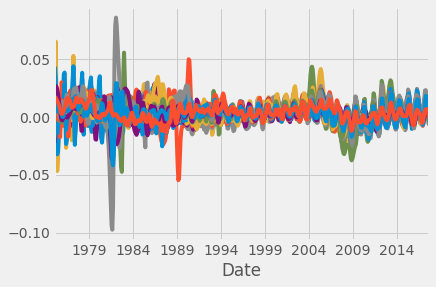

In [38]:
HPI_data.plot()
plt.legend().remove()
plt.show()

# percentage change starting 0th value

FMAC/HPI_AL
                  AL
Date                
1975-01-31  0.000000
1975-02-28  0.563941
1975-03-31  1.221516
1975-04-30  2.017970
1975-05-31  2.730277
FMAC/HPI_AK
                  AK
Date                
1975-01-31  0.000000
1975-02-28  1.443292
1975-03-31  2.921545
1975-04-30  4.479968
1975-05-31  6.221807
FMAC/HPI_AZ
                  AZ
Date                
1975-01-31  0.000000
1975-02-28  1.622304
1975-03-31  3.185277
1975-04-30  4.447226
1975-05-31  5.162205
FMAC/HPI_AR
                  AR
Date                
1975-01-31  0.000000
1975-02-28  1.044229
1975-03-31  1.962586
1975-04-30  2.707659
1975-05-31  3.388223
FMAC/HPI_CA
                  CA
Date                
1975-01-31  0.000000
1975-02-28  0.310304
1975-03-31  1.550517
1975-04-30  3.571143
1975-05-31  5.208027
FMAC/HPI_CO
                  CO
Date                
1975-01-31  0.000000
1975-02-28  0.973785
1975-03-31  1.952386
1975-04-30  2.942198
1975-05-31  3.832904
FMAC/HPI_CT
                  CT
Date         

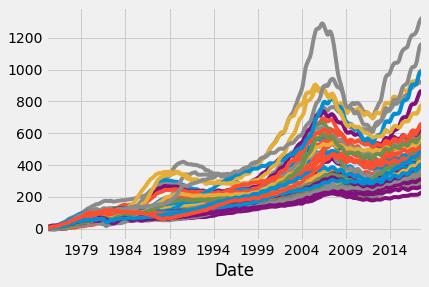

In [13]:
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')#read data from html page
    return fiddy_states[0][0][1:]# selecting first table of html page
def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        print(query)
        df.rename(columns={'Value':str(abbv)}, inplace=True)#its done because of value error
        df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        print(df.head())
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states3.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()
	
grab_initial_state_data()   

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data.plot()
plt.legend().remove()
plt.show()

# corelating each U.S state with another U.S sate

In [14]:
HPI_data = pd.read_pickle('fiddy_states3.pickle')
HPI_State_Correlation = HPI_data.corr()
print(HPI_State_Correlation)

          AL        AK        AZ        AR        CA        CO        CT  \
AL  1.000000  0.949600  0.941441  0.995209  0.944674  0.957867  0.951608   
AK  0.949600  1.000000  0.917584  0.970294  0.928500  0.958452  0.883141   
AZ  0.941441  0.917584  1.000000  0.940601  0.978504  0.923813  0.913701   
AR  0.995209  0.970294  0.940601  1.000000  0.948725  0.970534  0.941885   
CA  0.944674  0.928500  0.978504  0.948725  1.000000  0.943523  0.934186   
CO  0.957867  0.958452  0.923813  0.970534  0.943523  1.000000  0.871959   
CT  0.951608  0.883141  0.913701  0.941885  0.934186  0.871959  1.000000   
DE  0.983137  0.939002  0.948667  0.977653  0.964725  0.925899  0.979321   
FL  0.932612  0.908876  0.994724  0.932061  0.987007  0.917016  0.920078   
GA  0.979055  0.908380  0.953353  0.970335  0.955724  0.956564  0.941858   
HI  0.945563  0.950559  0.924739  0.953156  0.956592  0.933703  0.907686   
ID  0.981575  0.956671  0.968024  0.980506  0.959101  0.964187  0.910153   
IL  0.984248

# describing the corelation detail

In [15]:
print(HPI_State_Correlation.describe())

              AL         AK         AZ         AR         CA         CO  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    0.969845   0.942585   0.937087   0.971922   0.949042   0.951452   
std     0.025466   0.040180   0.025770   0.025437   0.022641   0.030284   
min     0.881332   0.785736   0.860392   0.870650   0.876620   0.847378   
25%     0.956978   0.931489   0.923835   0.967419   0.936985   0.935266   
50%     0.977239   0.952145   0.939052   0.978546   0.947678   0.957982   
75%     0.985701   0.964436   0.948415   0.989498   0.964576   0.973100   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              CT         DE         FL         GA    ...             SD  \
count  50.000000  50.000000  50.000000  50.000000    ...      50.000000   
mean    0.927643   0.962311   0.933539   0.955844    ...       0.961081   
std     0.040598   0.028586   0.028985   0.025213    ...       0.034307   
min     0.816186   0.871